In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

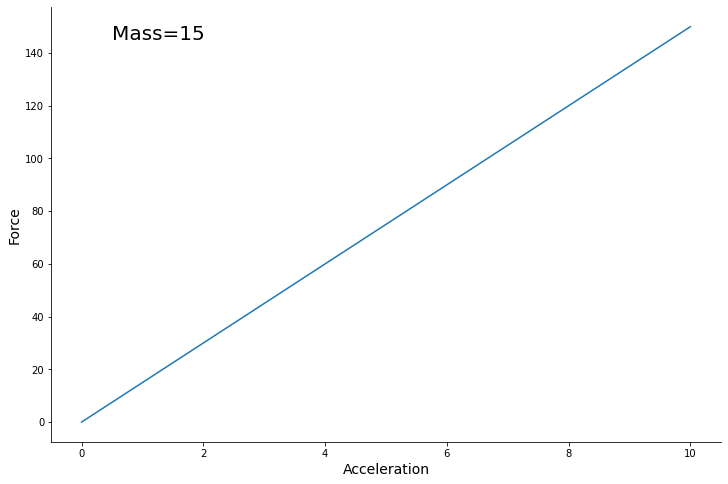

In [2]:
mass = 15
acceleration = np.linspace(0, 10)
force = mass*acceleration

fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(acceleration, force)
ax.set_xlabel("Acceleration", fontsize=14)
ax.set_ylabel("Force", fontsize=14)
ax.text(0.5, 145, "Mass=15", fontsize=20)

#Hide top-right axis
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

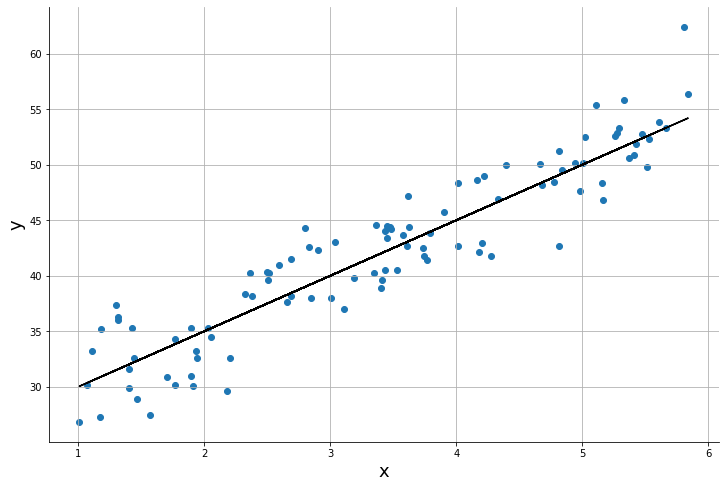

In [3]:
x = np.random.random(100)*5 + 1
b0 = 25
b1 = 5
e = np.random.normal(0, 3, len(x))
y = b0 + x*b1 + e


fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.scatter(x, y)
ax.plot(x, b0+x*b1, color='black')
ticks_loc = ax.get_xticks().tolist()
ax.set_xticks(np.arange(1,7))
ax.grid(True)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
#Hide top-right axis
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

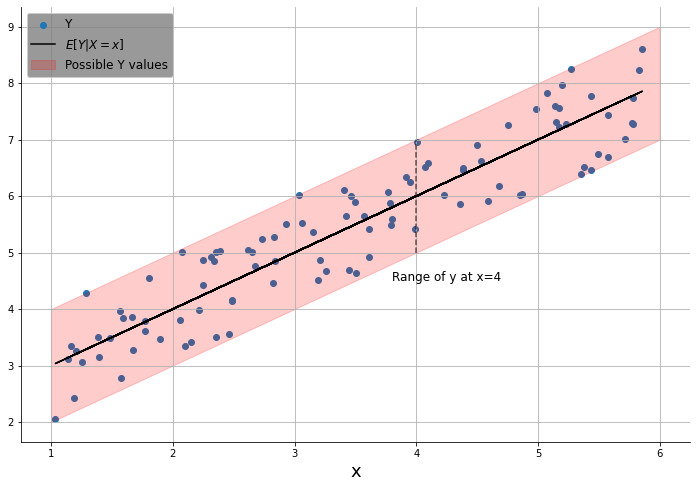

In [4]:
x = np.random.random(100)*5 + 1
b0 = 2
b1 = 1
e = np.random.random(len(x))*2 - 1
y = b0 + x*b1 + e

t = np.linspace(1, 6)
y_upper = b0 + t*b1 + 1
y_lower = b0 + t*b1 - 1


fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.scatter(x, y, label="Y")
ax.plot(x, b0+x*b1, color='black', label=r'$E[Y | X=x]$')
ax.fill_between(t, y_lower, y_upper, color='red', alpha=0.2, label='Possible Y values')

ticks_loc = ax.get_xticks().tolist()
ax.set_xticks(np.arange(1,7))
ax.grid(True)
ax.set_xlabel("x", fontsize=18)
#Hide top-right axis
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(loc="upper left", fontsize=12, facecolor='grey')
ax.vlines(x=4, ymin=5, ymax=7, color='black', linestyles='dashed', alpha=0.6)
ax.text(3.8, 4.5, "Range of y at x=4", fontsize=12)
plt.show()

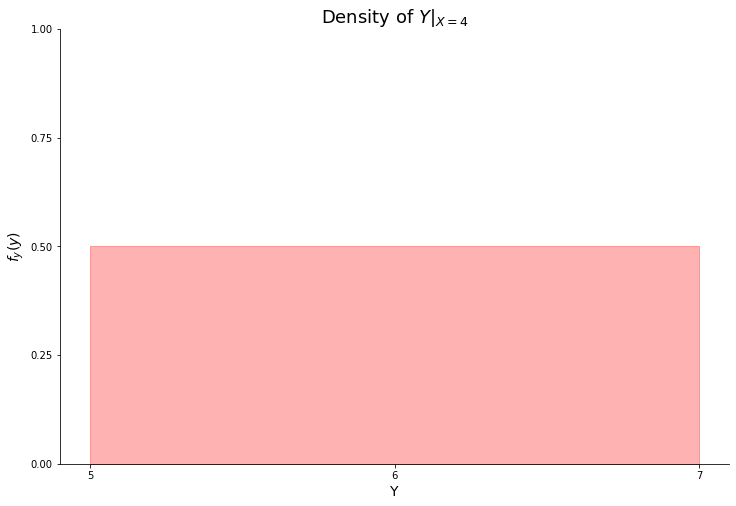

In [5]:
x = np.linspace(5, 7)
p_x = [1/2]*len(x)

fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.fill_between(x, 0, p_x, color='red', alpha=0.3, label='Possible Y values', edgecolor='red')
ax.set_xlabel("Y", fontsize=14)
ax.set_ylabel("$f_y(y)$", fontsize=14)
#ax.plot(x, p_x, color='red',)
ax.set_xlim(4.9,7.1)
ax.set_ylim(0, 1)
ax.set_xticks([5, 6, 7])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

#Hide top-right axis
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.title("Density of $Y|_{X=4}$", fontsize=18)
plt.show()

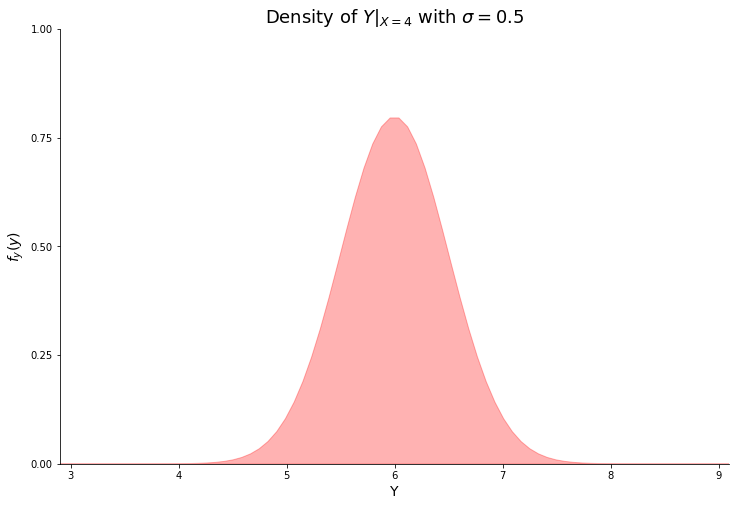

In [6]:
from scipy.stats import norm

rv = norm(scale=0.5)
x = np.linspace(-4, 4, num=100)
p_x = rv.pdf(x)
x += 6

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.fill_between(x, 0, p_x, color='red', alpha=0.3, label='Possible Y values', edgecolor='red')
ax.set_xlabel("Y", fontsize=14)
ax.set_ylabel("$f_y(y)$", fontsize=14)
#ax.plot(x, p_x, color='red',)
ax.set_xlim(2.9,9.1)
ax.set_ylim(0, 1)
ax.set_xticks([3, 4, 5, 6, 7, 8, 9])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

#Hide top-right axis
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.title("Density of $Y|_{X=4}$ with $\sigma=0.5$", fontsize=18)
plt.show()

In [7]:
def simplelr(x,y):
    # naively compute least squares estimator
    
    # compute mean of x and y
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    
    # first calculate beta 1
    b_1 = np.sum((y-y_bar) * (x-x_bar)) # numerator first
    b_1 = b_1/np.sum(np.square((x-x_bar)))
    
    # now beta 0 is given by
    b_0 = y_bar - b_1*x_bar
    
    return b_0, b_1

In [8]:
df = pd.read_excel(r"M:/data/blog/linreg/swedeninsurance.xls", engine="xlrd")
# https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html
df.columns = ['num_claims', 'total_payment']
y = np.sqrt(df['num_claims'].values)
x = np.sqrt(df['total_payment'].values)

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


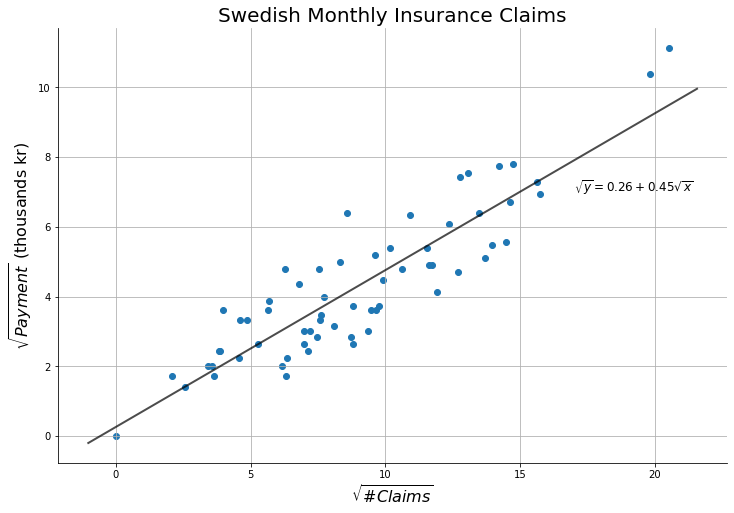

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.scatter(x, y) # plot obvservation pairs

x_lin = np.linspace(*ax.get_xlim(), 2)
beta = simpleLR(x, y)
ax.plot(x_lin, beta[0] + beta[1]*x_lin, color='black', 
       linewidth=2, alpha=0.7)


#Hide top-right axis
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(True)
ax.set_xlabel("$\sqrt{\# Claims}$", fontsize=16)
ax.set_ylabel("$\sqrt{Payment}$ (thousands kr)", fontsize=16)
plt.title("Swedish Monthly Insurance Claims", fontsize=20)
ax.text(17, 7,
       f"$\sqrt{{y}}= {beta[0]:.2f} + {beta[1]:.2f}\sqrt{{x}}$", 
       fontsize=12)
plt.show()

In [16]:
def multiplelr(x,y):
    # naively compute least squares estimator
    # ((XT)(X))^-1
    beta = np.linalg.inv(np.matmul(np.transpose(x), x))
    # ((XT)(X))^-1 (XT)
    beta = np.matmul(beta, np.transpose(x))
    # ((XT)(X))^-1 (XT) y
    beta = np.matmul(beta, y)
    return beta

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
y = df['charges'].values
X = np.ones((len(y), 3), dtype=np.float32)
X[:, 1:] = df[['age', 'bmi']].values

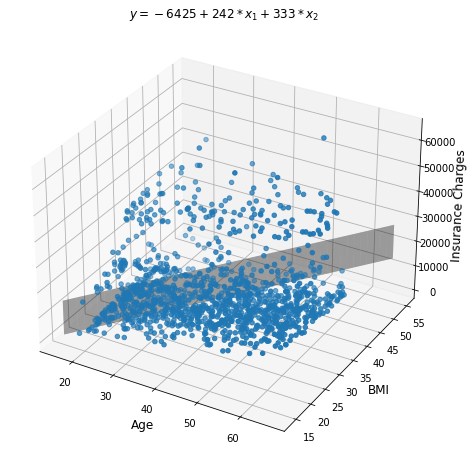

In [57]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# plot data points
ax.scatter3D(X[:,1], X[:,2], y)

# make plane
beta = multipleLR(X, y)
x1_lin = np.linspace(*ax.get_xlim())
x2_lin = np.linspace(*ax.get_ylim())
x1,x2 = np.meshgrid(x1_lin, x2_lin)
z = beta[0] + beta[1]*x1 + beta[2]*x2
ax.plot_surface(x1_lin, x2_lin, z, alpha=0.4, color='black')

ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('BMI', fontsize=12)
ax.set_zlabel('Insurance Charges', fontsize=12)

equation = f"$y={beta[0]:.0f}+{beta[1]:.0f}*{{x_1}}+{beta[2]:.0f}*{{x_2}}$"
plt.title(equation)

plt.show()